In [1]:
import os
import sys
import numpy as np
import cupy as cp

sys.path.insert(0, os.path.abspath('..'))
from drizzle import *

%matplotlib inline
import matplotlib.pyplot as plt

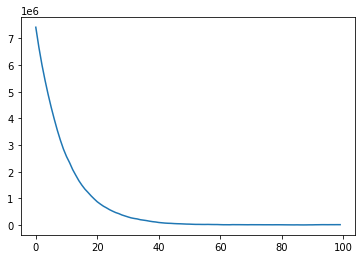

In [2]:
data = np.load('test_imgs.npz')
imgs = data['imgs']
truth = data['truth']
cnts = np.sum(imgs,axis=(1,2))
plt.plot(cnts)
flux = analyze_flux(cnts)
psf = cp.array(gauss_psf(6.2))

In [6]:
update_config({"map_iterations":1000, "uninformative_a":0.5})

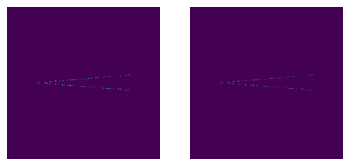

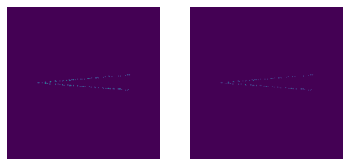

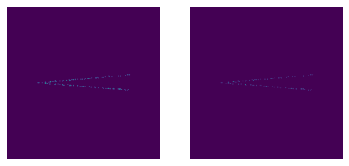

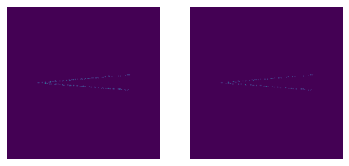

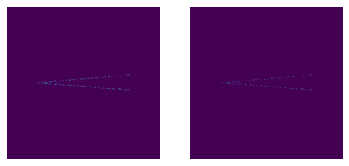

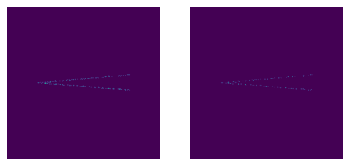

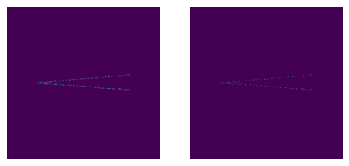

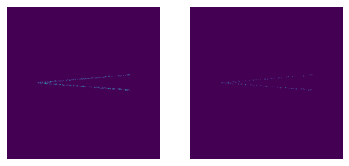

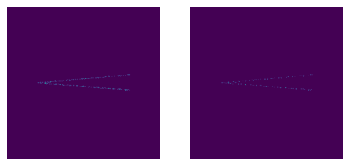

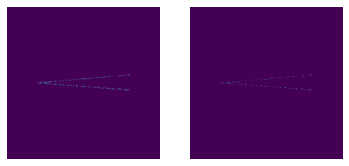

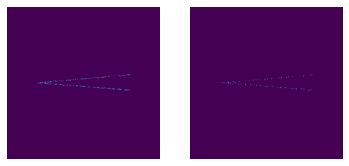

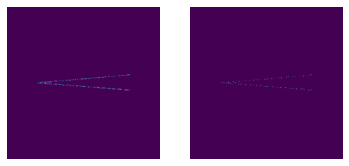

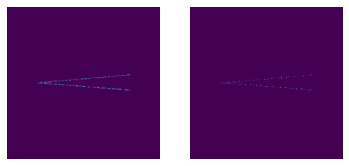

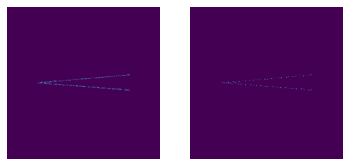

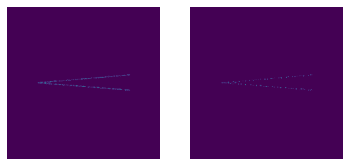

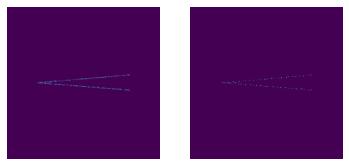

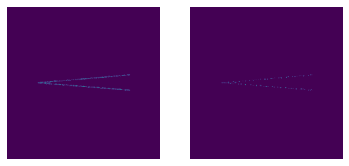

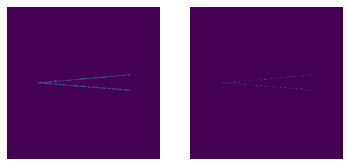

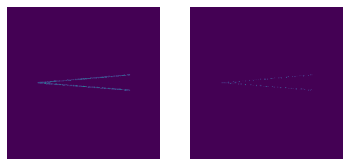

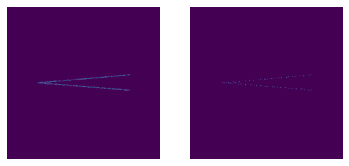

In [4]:
#theta = sparse_deconv(imgs[41,...], psf)
theta = cp.array(truth[41,...])
for frame in range(40, 20, -1):
    theta = map_process_frame(frame, imgs, psf, flux, theta)
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(truth[frame,...])
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(cp.asnumpy(theta))
    plt.axis('off')
    plt.show()

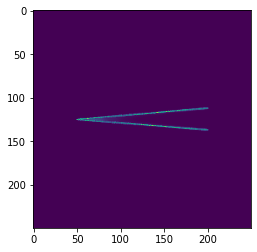

In [5]:
theta1 = map_process_frame(0, imgs, psf, flux, cp.array(truth[1,...]))
plt.imshow(cp.asnumpy(theta1))

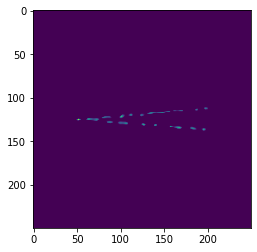

In [3]:
theta = sparse_deconv(imgs[41,...], psf)
plt.imshow(cp.asnumpy(theta))

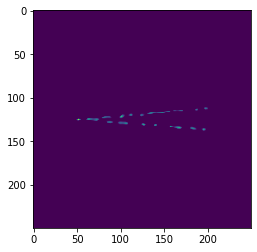

In [3]:
theta = sparse_deconv(imgs[41,...], psf)
plt.imshow(cp.asnumpy(theta))

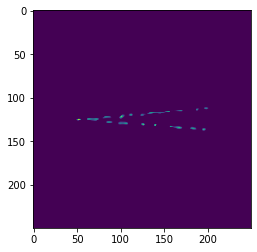

In [3]:
psfz = cp.array(adjusted_psf_subpixel(cp.asnumpy(psf), 5))
img = imgs[41,...].reshape(250//5,5,250//5,5)
img = img.sum(axis=(1,3))
theta = sparse_deconv(img, psfz, 5)
plt.imshow(cp.asnumpy(theta))

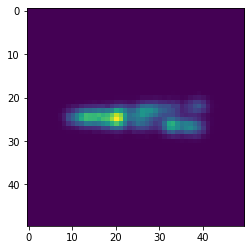

In [9]:
plt.imshow(img)